
# Project: TMDB movie dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
his data set contains information about 10,000 movies collected from The Movie Database (TMDb),including user ratings and revenue.

#### Q1
Which genres are most popular from year to year?
#### Q2
What kinds of properties are associated with movies that have high revenues?
#### Q3
What are the movies with highest revenues in each genra

In [33]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [34]:
df = pd.read_csv('tmdb-movies.csv') # loading the dataset
df.iloc[:5,:]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

### Data Cleaning 



Seems like there are some columns that will not help in finding our answers about the dataset so removing it will make it easier to analyse



In [36]:
df = df.drop(columns = ['id','imdb_id','cast','homepage','director','tagline','keywords','overview','production_companies',
                   'release_date'])
df.head()

,popularity,budget,revenue,original_title,runtime,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,110000000,295238201,Insurgent,119,Adventure|Science Fiction|Thriller,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,136,Action|Adventure|Science Fiction|Fantasy,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,190000000,1506249360,Furious 7,137,Action|Crime|Thriller,2947,7.3,2015,1.747999e+08,1.385749e+09


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   popularity      10866 non-null  float64
 1   budget          10866 non-null  int64  
 2   revenue         10866 non-null  int64  
 3   original_title  10866 non-null  object 
 4   runtime         10866 non-null  int64  
 5   genres          10843 non-null  object 
 6   vote_count      10866 non-null  int64  
 7   vote_average    10866 non-null  float64
 8   release_year    10866 non-null  int64  
 9   budget_adj      10866 non-null  float64
 10  revenue_adj     10866 non-null  float64
dtypes: float64(4), int64(5), object(2)
memory usage: 933.9+ KB


***genres*** coulumn has some missing values so we will drop them for now

In [38]:
df.dropna(inplace = True)

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10843 entries, 0 to 10865
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   popularity      10843 non-null  float64
 1   budget          10843 non-null  int64  
 2   revenue         10843 non-null  int64  
 3   original_title  10843 non-null  object 
 4   runtime         10843 non-null  int64  
 5   genres          10843 non-null  object 
 6   vote_count      10843 non-null  int64  
 7   vote_average    10843 non-null  float64
 8   release_year    10843 non-null  int64  
 9   budget_adj      10843 non-null  float64
 10  revenue_adj     10843 non-null  float64
dtypes: float64(4), int64(5), object(2)
memory usage: 1016.5+ KB


let's look at some statistics for the data

In [40]:
df.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10843.000000,1.084300e+04,1.084300e+04,10843.000000,10843.000000,10843.000000,10843.000000,1.084300e+04,1.084300e+04
mean,0.647456,1.465672e+07,3.990779e+07,102.137508,217.813705,5.973974,2001.315595,1.758827e+07,5.147332e+07
std,1.000986,3.093864e+07,1.171131e+08,31.293320,576.155351,0.934260,12.813298,3.433299e+07,1.447664e+08
min,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,0.208253,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,0.384555,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,0.715349,1.500000e+07,2.413675e+07,111.000000,146.000000,6.600000,2011.000000,2.093530e+07,3.387655e+07
max,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


It seems that there are so many movies that have so little **vote counts** and there are movies has so little **budget** of zero so we will drop movies with vote_count > average and drop movies with a budget of zero 

In [41]:
df = df.drop(df[(df['vote_count'] < df['vote_count'].mean()) | (df['budget'] == 0) | (df['revenue'] == 0)].index)

In [42]:
df.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,1869.000000,1.869000e+03,1.869000e+03,1869.000000,1869.000000,1869.000000,1869.000000,1.869000e+03,1.869000e+03
mean,1.891802,5.443211e+07,1.885756e+08,112.143392,996.416800,6.430230,2004.032638,6.093549e+07,2.290501e+08
std,1.854752,5.048769e+07,2.221152e+08,20.004651,1080.134241,0.727232,10.332818,5.211915e+07,2.693289e+08
min,0.040858,3.000000e+01,4.600000e+01,69.000000,218.000000,3.800000,1960.000000,5.006696e+01,4.837675e+01
25%,0.981468,1.800000e+07,5.330231e+07,97.000000,352.000000,5.900000,2000.000000,2.326555e+07,6.264908e+07
50%,1.375772,4.000000e+07,1.192090e+08,108.000000,592.000000,6.400000,2007.000000,4.519285e+07,1.429501e+08
75%,2.179727,7.500000e+07,2.349896e+08,123.000000,1152.000000,7.000000,2012.000000,8.538317e+07,2.933291e+08
max,32.985763,3.800000e+08,2.781506e+09,216.000000,9767.000000,8.400000,2015.000000,3.683713e+08,2.827124e+09


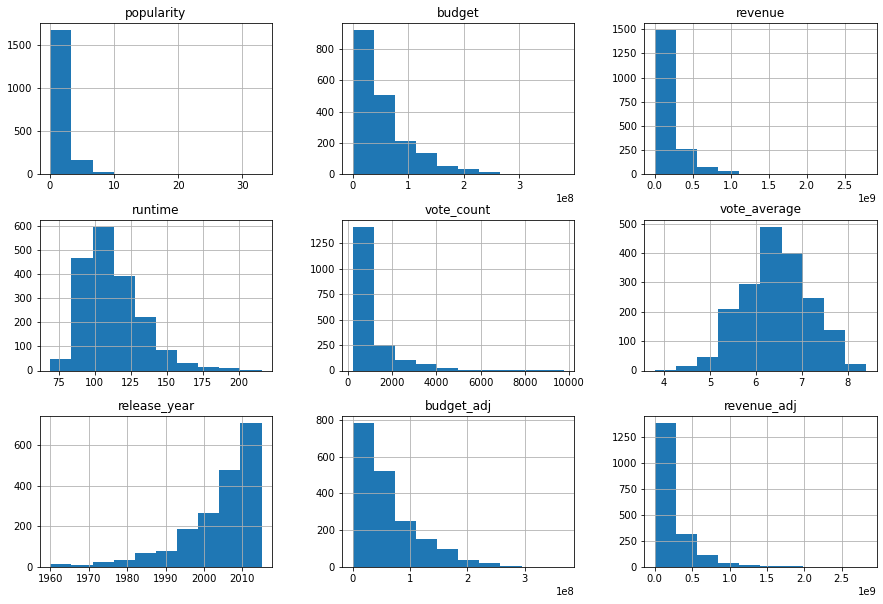

In [43]:
df.hist(figsize = (15,10));

#### Graph above give us more insights about the describtion of the data 
We can see that budget and revenue is skewed to right and vote average has a normal distribution

<a id='eda'></a>
## Exploratory Data Analysis



### Research Question 1 
Which genres are most popular from year to year?

In [44]:
df.head()

,popularity,budget,revenue,original_title,runtime,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,110000000,295238201,Insurgent,119,Adventure|Science Fiction|Thriller,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,136,Action|Adventure|Science Fiction|Fantasy,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,190000000,1506249360,Furious 7,137,Action|Crime|Thriller,2947,7.3,2015,1.747999e+08,1.385749e+09


To answer the first question we have to get every genra separatly as each movie in the dataset may have more than one genra in the same row

In [45]:
df['genres'].value_counts().keys() # taking a look at the different genres

Index(['Comedy', 'Drama', 'Comedy|Romance', 'Drama|Romance',
       'Comedy|Drama|Romance', 'Horror|Thriller', 'Comedy|Drama', 'Horror',
       'Action|Thriller', 'Crime|Drama|Thriller',
       ...
       'Music|Adventure|Animation|Action|Comedy', 'Comedy|Drama|Adventure',
       'Music|Comedy|Action|Crime', 'Action|Horror', 'Drama|Fantasy|Horror',
       'Adventure|Family|Animation|Action|Comedy',
       'Adventure|Fantasy|Animation|Comedy|Action',
       'Comedy|Action|Adventure|Fantasy|Science Fiction',
       'Family|Adventure|Animation|Comedy', 'Horror|Romance'],
      dtype='object', length=676)

In the next cell i will make a list with all genres in the dataset

In [46]:
gen_list = []
for item in df['genres'].value_counts().keys():
    temp = item.split('|')
    for gen in temp:
        if gen not in gen_list:
            gen_list.append(gen)
gen_list            

['Comedy',
 'Drama',
 'Romance',
 'Horror',
 'Thriller',
 'Action',
 'Crime',
 'Adventure',
 'Animation',
 'Family',
 'Science Fiction',
 'Fantasy',
 'Mystery',
 'War',
 'History',
 'Music',
 'Western',
 'Documentary']

Since the movies are from 1960 to 2015 so i will cut them manually to 3 categories :
   <br>    1 - between 1960 - 1980
   <br>  2 - between 1980 - 2000
   <br>  3 - between 2000 - 2020 
<br> **note :** since there are only 3 categories i didnt add another attribute to the dataset       

For each genra of these categories i will get it's mean popularity

In [47]:
# first category

pop_list_80 = []
for gen in gen_list:
    pop_list_80.append(df[(df['genres'].str.contains(gen)) & (df['release_year'].between(1950, 1980, inclusive=True))]['popularity'].mean())    

In [48]:
# second category
pop_list_2000 = []
for gen in gen_list:
    pop_list_2000.append(df[(df['genres'].str.contains(gen)) & (df['release_year'].between(1981, 2000, inclusive=True))]['popularity'].mean())    

In [49]:
# third category
pop_list_2020 = []
for gen in gen_list:
    pop_list_2020.append(df[(df['genres'].str.contains(gen)) & (df['release_year'].between(2001, 2020, inclusive=True))]['popularity'].mean())    

now lets plot these mean popularities for each genra to get answers for the first question

First i will make function that will help me for plotting so i dont repeat code

In [50]:
def plot_func(x,y,xl,yl,title,x_size = 25,y_size = 10):
    plt.subplots(figsize = (x_size,y_size));
    plt.bar(x,y);
    plt.title(title);
    plt.xlabel(xl);
    plt.ylabel(yl);

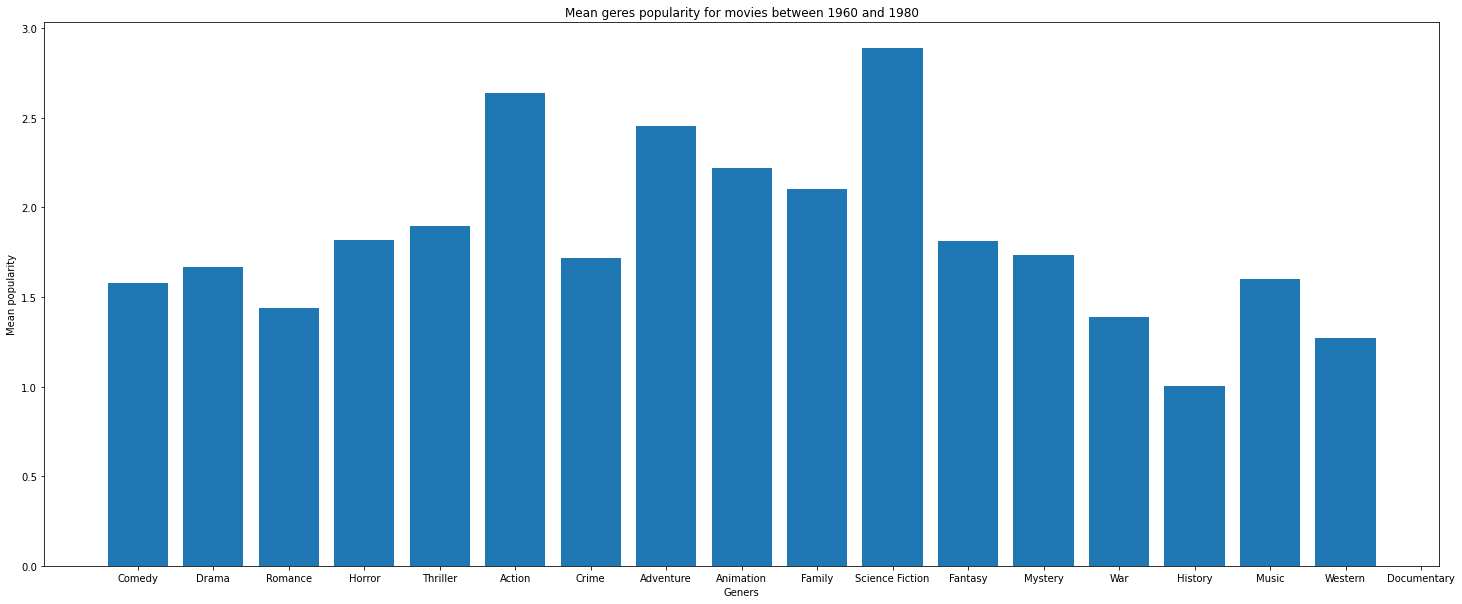

In [51]:
plot_func(gen_list,pop_list_80,'Geners','Mean popularity','Mean geres popularity for movies between 1960 and 1980')

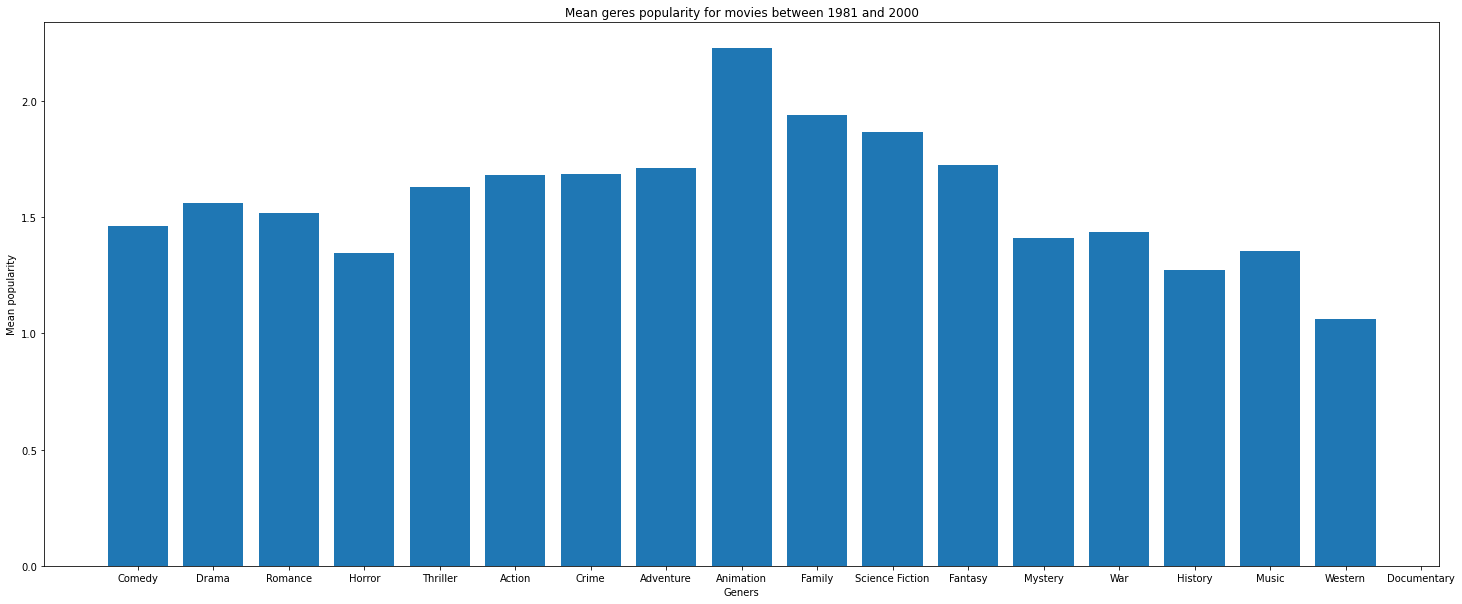

In [52]:
plot_func(gen_list,pop_list_2000,'Geners','Mean popularity','Mean geres popularity for movies between 1981 and 2000')

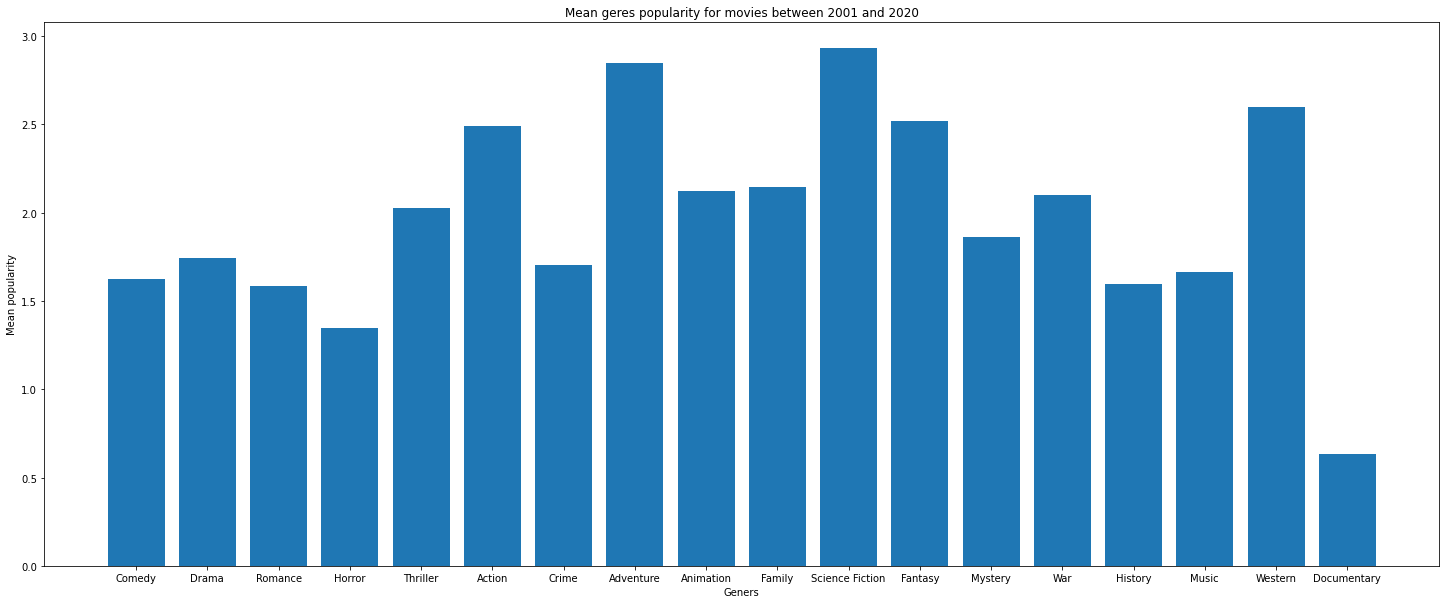

In [53]:
plot_func(gen_list,pop_list_2020,'Geners','Mean popularity','Mean geres popularity for movies between 2001 and 2020')

From the above plots we can see that :
<br> Between 1960 and 1980 the most poplualr genres are **Sience fiction** and **Action**
<br> Between 1980 and 2000 the most poplualr genres are **Animation** and **Family**
<br> Between 2000 and 2020 the most poplualr genres are **Sience fiction** and **Adventure**

### Research Question 2 
What kinds of properties are associated with movies that have high revenues?

First, lets get the movies that have higher revenues than average

In [54]:
high_rev = df.query('revenue_adj > revenue_adj.mean()')
high_rev.head()

,popularity,budget,revenue,original_title,runtime,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,110000000,295238201,Insurgent,119,Adventure|Science Fiction|Thriller,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,136,Action|Adventure|Science Fiction|Fantasy,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,190000000,1506249360,Furious 7,137,Action|Crime|Thriller,2947,7.3,2015,1.747999e+08,1.385749e+09


Then we can get all statistics we need for our analysis

In [55]:
high_rev.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,607.000000,6.070000e+02,6.070000e+02,607.000000,607.000000,607.000000,607.000000,6.070000e+02,6.070000e+02
mean,2.751857,8.854684e+07,4.038383e+08,118.388797,1688.495881,6.570675,2000.943987,1.002807e+08,5.061273e+08
std,2.709802,6.318649e+07,2.758993e+08,22.727408,1496.285804,0.694222,11.686788,6.025997e+07,3.183649e+08
min,0.131526,2.500000e+04,3.200000e+07,78.000000,219.000000,4.400000,1960.000000,3.272632e+04,2.291230e+08
25%,1.358652,3.500000e+07,2.361386e+08,101.000000,604.000000,6.100000,1995.000000,5.199553e+07,3.023651e+08
50%,2.065619,8.000000e+07,3.252339e+08,116.000000,1147.000000,6.500000,2003.000000,9.363868e+07,4.070878e+08
75%,3.173410,1.300000e+08,4.789863e+08,131.000000,2371.000000,7.100000,2010.000000,1.423520e+08,6.081368e+08
max,32.985763,3.800000e+08,2.781506e+09,216.000000,9767.000000,8.300000,2015.000000,3.683713e+08,2.827124e+09


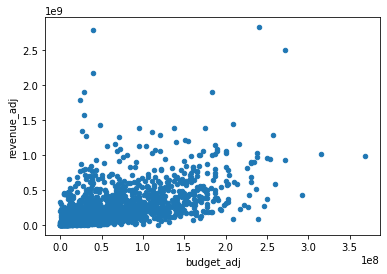

In [56]:
df.plot(x = 'budget_adj', y ='revenue_adj',kind = 'scatter');

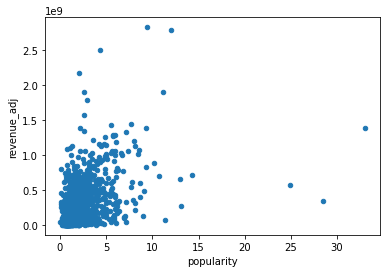

In [57]:
df.plot(x = 'popularity', y ='revenue_adj',kind = 'scatter');

we can know from the above plots that the popularity and budget has a positive correlations with the revenues

let's also have a look at the genres that have higher revenues

Just like i did in the in the previous question i will plot the mean revenue versus genra

In [58]:
revenues = []
for gen in gen_list:
    revenues.append(df[(df['genres'].str.contains(gen))]['revenue_adj'].mean())    
 

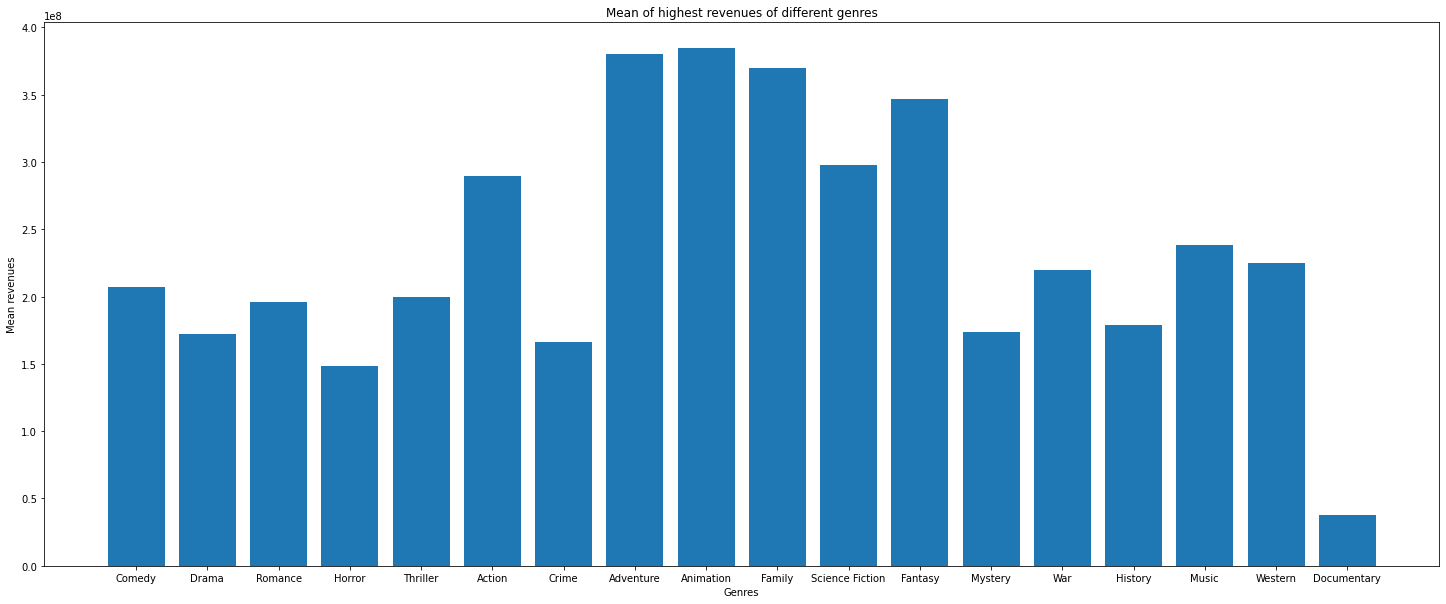

In [59]:
plot_func(gen_list,revenues,'Genres','Mean revenues','Mean of highest revenues of different genres')

### Research Question 3
What are the movies with highest revenues in each genra

In [60]:
mov_list = []
for gen in gen_list:
    temp = df[(df['genres'].str.contains(gen))]
    mov_list.append(temp[temp['revenue_adj'] == temp['revenue_adj'].max()]['original_title'].item())

In [61]:
df_2 = pd.DataFrame(mov_list, index =gen_list,columns =['titles'])
df_2

,titles
Comedy,One Hundred and One Dalmatians
Drama,Titanic
Romance,Titanic
Horror,The Exorcist
Thriller,Titanic
Action,Avatar
Crime,Furious 7
Adventure,Avatar
Animation,One Hundred and One Dalmatians
Family,E.T. the Extra-Terrestrial


And finally the above results shows us the highest revenue movie for every genra

<a id='conclusions'></a>
## Conclusions
<br>**1-** Science fiction, adventure, action and family movies seems to be very popular to people over time
<br>**2-** Animation and adventure movies have the highest revenues 
<br>**3-** The popularity and budget has a positive correlations with the revenues
<br>**4-** There are movies that are so successful in more than one genra such as **Titanic**,**Avatar**

### limitations
<br>**1-** The release_year column is skewed to left with so little information about old movies and also the dataset need to be updated to fit to the mean time as there are alot of new movies have been made since 2015
<br>**2-** There were alot of movies that have so little votes and a budget of zero which is not efficient 
